#### Enhanced sampling along C-C-C-C dihedral of butane using standard metadynamics with HOOMD and PySAGES
#### SD, Ferguson lab

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import mdtraj as md

import sys
sys.path.append("/home/sivadasetty/scratch-midway2/software/enhancements/SSAGES/PySAGES-openmm/PySAGES/examples/meta/")
import analysis as ana

In [2]:
folderdir = "/home/sivadasetty/scratch-midway2/software/enhancements/SSAGES/PySAGES/examples/meta/"

unbiaseddir = 'butane-unbiased-1e8/'
exampledir1 = "up-butane-w-0.01-s-0.1/"
exampledir2 = "up-butane-w-0.01-s-0.1-st-100/"
exampledir3 = "up-butane-w-0.1-s-0.1/"
exampledir4 = "up-butane-w-0.1-s-0.1-st-100/"

#### compare sampling of unbiased and biased runs

In [3]:
# read trajectories and compute dihedrals
# read trajectories
unbiasedTraj = md.load(folderdir + unbiaseddir + 'dump.gsd')
exampleTraj1 = md.load(folderdir + exampledir1 + 'dump-butane.gsd')
exampleTraj2 = md.load(folderdir + exampledir2 + 'dump-butane.gsd')
exampleTraj3 = md.load(folderdir + exampledir3 + 'dump-butane.gsd')
exampleTraj4 = md.load(folderdir + exampledir4 + 'dump-butane.gsd')

# compute dihedrals
unbiasedDihedrals = md.compute_dihedrals(unbiasedTraj, np.array([ [0, 4, 7, 10] ]) )
exampleDihedrals1 = md.compute_dihedrals(exampleTraj1, np.array([ [0, 4, 7, 10] ]) )
exampleDihedrals2 = md.compute_dihedrals(exampleTraj2, np.array([ [0, 4, 7, 10] ]) )
exampleDihedrals3 = md.compute_dihedrals(exampleTraj3, np.array([ [0, 4, 7, 10] ]) )
exampleDihedrals4 = md.compute_dihedrals(exampleTraj4, np.array([ [0, 4, 7, 10] ]) )

/home/sivadasetty/.conda/envs/sd-pysages/lib/python3.8/site-packages/mdtraj/utils/validation.py:115: TypeCastPerformanceWarning: Casting unitcell_vectors dtype=float64 to <class 'numpy.float32'> 
  warnings.warn("Casting %s dtype=%s to %s " % (name, val.dtype, dtype),


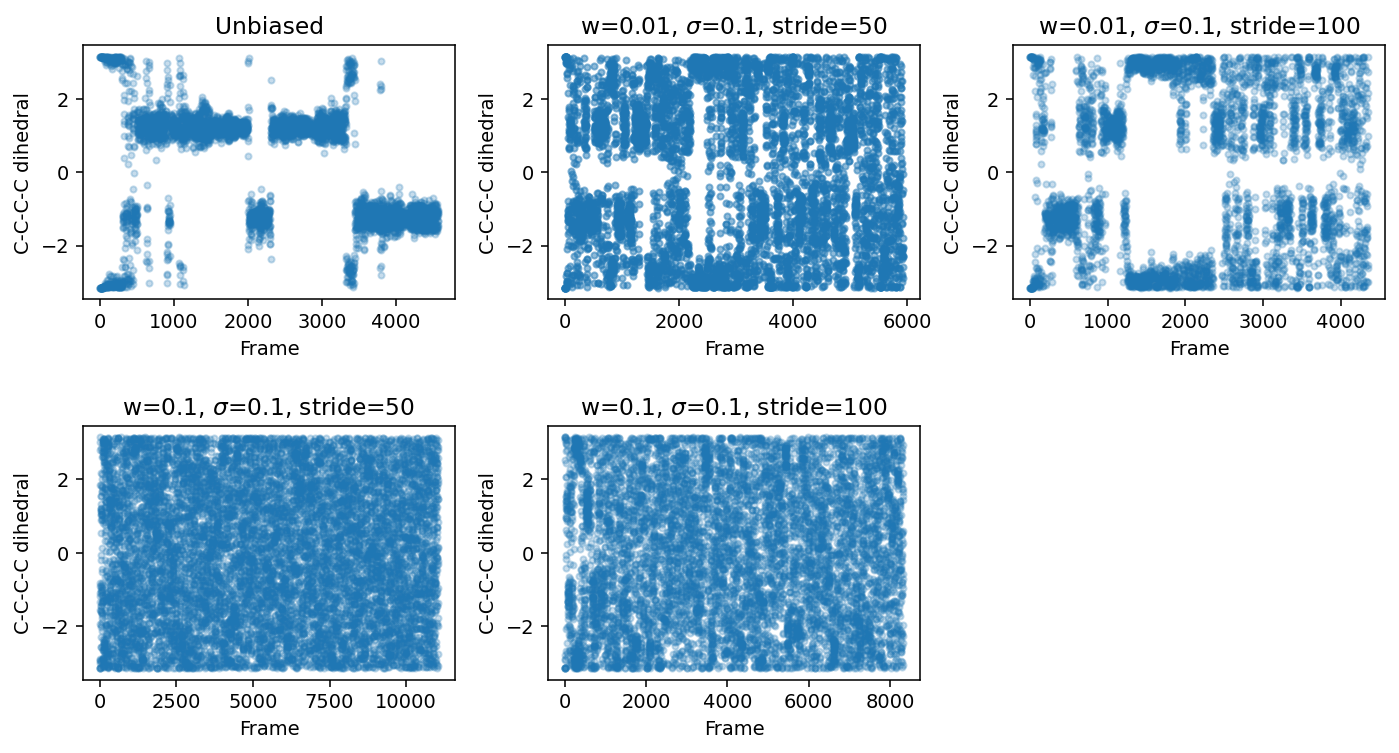

In [6]:
# plot dihedrals
plt.figure(figsize=(12,6), dpi=140);
plt.subplots_adjust(wspace=0.25, hspace=0.5)


plt.subplot(2, 3, 1)
x = np.arange(unbiasedDihedrals.shape[0])
plt.scatter(x, unbiasedDihedrals, s=10, alpha=0.25);
plt.ylabel('C-C-C-C dihedral');
plt.xlabel('Frame');
plt.title('Unbiased');

plt.subplot(2, 3, 2)
x = np.arange(exampleDihedrals1.shape[0])
plt.scatter(x, exampleDihedrals1, s=10, alpha=0.5);
plt.ylabel('C-C-C-C dihedral');
plt.xlabel('Frame');
plt.title(r'w=0.01, $\sigma$=0.1, stride=50');

plt.subplot(2, 3, 3)
x = np.arange(exampleDihedrals2.shape[0])
plt.scatter(x, exampleDihedrals2, s=10, alpha=0.25);
plt.ylabel('C-C-C-C dihedral');
plt.xlabel('Frame');
plt.title(r'w=0.01, $\sigma$=0.1, stride=100');

plt.subplot(2, 3, 4)
x = np.arange(exampleDihedrals3.shape[0])
plt.scatter(x, exampleDihedrals3, s=10, alpha=0.25);
plt.ylabel('C-C-C-C dihedral');
plt.xlabel('Frame');
plt.title(r'w=0.1, $\sigma$=0.1, stride=50');

plt.subplot(2, 3, 5)
x = np.arange(exampleDihedrals4.shape[0])
plt.scatter(x, exampleDihedrals4, s=10, alpha=0.25);
plt.ylabel('C-C-C-C dihedral');
plt.xlabel('Frame');
plt.title(r'w=0.1, $\sigma$=0.1, stride=100');

plt.savefig('Figures/butane-dihedrals-frame.png', bbox_inches = "tight")

#### Read hills files and calculate free energies

In [7]:
exampledir1 = "up-butane-w-0.01-s-0.1/"
exampledir2 = "up-butane-w-0.01-s-0.1-st-100/"
exampledir3 = "up-butane-w-0.1-s-0.1/"
exampledir4 = "up-butane-w-0.1-s-0.1-st-100/"

hillsFile1 = folderdir + exampledir1 + "hills.dat"
hillsFile2 = folderdir + exampledir2 + "hills.dat"
hillsFile3 = folderdir + exampledir3 + "hills.dat"
hillsFile4 = folderdir + exampledir4 + "hills.dat"


hillsData1 = pd.read_csv(hillsFile1, delim_whitespace=True, comment="#", names=["time", "cv", "sigma", "height"])
hillsData2 = pd.read_csv(hillsFile2, delim_whitespace=True, comment="#", names=["time", "cv", "sigma", "height"])
hillsData3 = pd.read_csv(hillsFile3, delim_whitespace=True, comment="#", names=["time", "cv", "sigma", "height"])
hillsData4 = pd.read_csv(hillsFile4, delim_whitespace=True, comment="#", names=["time", "cv", "sigma", "height"])

#print(hillsData.shape)

x = np.linspace(-math.pi, math.pi, num=50, endpoint=True)
fes1 = ana.sum_gaussians(x, hillsData1)
fes2 = ana.sum_gaussians(x, hillsData2)
fes3 = ana.sum_gaussians(x, hillsData3)
fes4 = ana.sum_gaussians(x, hillsData4)

#### plot free energies

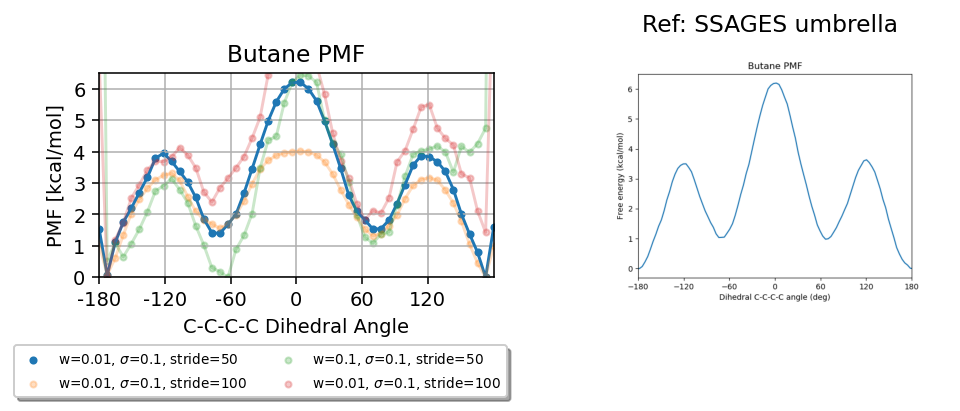

In [8]:
plt.figure(figsize=(8,2.5), dpi=140);

plt.subplot(1, 2, 1)

plt.ylabel('PMF [kcal/mol]');
plt.xlabel('C-C-C-C Dihedral Angle');
plt.title("Butane PMF")

plt.scatter(x,-fes1 + fes1.max() , label=r'w=0.01, $\sigma$=0.1, stride=50', s=10);
plt.scatter(x,-fes2 + fes2.max() , label=r'w=0.01, $\sigma$=0.1, stride=100', s=10, alpha=0.25);
plt.scatter(x,-fes3 + fes3.max() , label=r'w=0.1, $\sigma$=0.1, stride=50', s=10, alpha=0.25);
plt.scatter(x,-fes4 + fes4.max() , label=r'w=0.01, $\sigma$=0.1, stride=100', s=10, alpha=0.25);

plt.plot(x,-fes1 + fes1.max() );
plt.plot(x,-fes2 + fes2.max(), alpha=0.25);
plt.plot(x,-fes3 + fes3.max(), alpha=0.25);
plt.plot(x,-fes4 + fes4.max(), alpha=0.25);


theta = np.arange(-math.pi , math.pi, step=(math.pi/3))
#plt.xticks(theta, ['-π', '-2π/3', '-π/3', '0', 'π/3', '2π/3', 'π'])
plt.xticks(theta, ['-180', '-120', '-60', '0', '60', '120', '180'])

plt.margins(x=0, y=0)
plt.ylim(0, 6.5)
ax = plt.gca()
ax.set_aspect(0.5) 

plt.yticks(np.arange(0, 6.5, 1))
plt.grid()
#plt.legend(fontsize=7)
plt.legend(fontsize=7, bbox_to_anchor=(1.05, -0.3),
          fancybox=True, shadow=True, ncol=2)


plt.subplot(1, 2, 2)

#https://github.com/SSAGESproject/SSAGES/tree/release-0.9/Examples/User/Umbrella/HOOMD/sample_outputs
plt.title('Ref: SSAGES umbrella')
ssages_butane_pmf_file = mpimg.imread('wham_free_energy.png')
plt.imshow(ssages_butane_pmf_file)
ax = plt.gca()
ax.set_aspect(1) 
plt.axis('off')

plt.savefig('Figures/butane-pmf-standard-meta.png', bbox_inches = "tight")